In [1]:
#Libraries
import pandas as pd #Bibliothek für Datenmanipulation und -analyse.
import numpy as np #Bibliothek für mathematische Funktionen.
import matplotlib.pyplot as plt #Bibliothek zum Erstellen von statischen, animierten und interaktiven Visualisierungen.
import seaborn as sns #Bibliothek für statistische Datenvisualisierung basierend auf matplotlib.
# knn
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors Klassifikator aus scikit-learn.
from sklearn import neighbors #Modul für K-Nearest Neighbors Algorithmen.
from sklearn.model_selection import cross_val_score #Funktion zur Bewertung eines Scores durch Kreuzvalidierung.
from sklearn.preprocessing import StandardScaler #Standardisiert Merkmale, indem der Mittelwert entfernt und auf die Einheitsskala skaliert wird.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV #Funktion zum Aufteilen von Arrays oder Matrizen in zufällige Trainings- und Testsätze.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay #Modul zur Berechnung von Klassifikationsmetriken.
from mlxtend.plotting import plot_decision_regions #Funktion zum Plotten von Entscheidungsregionen von Klassifikatoren.
# Entscheidungsbaum
from sklearn.tree import DecisionTreeClassifier #Entscheidungsbaum-Klassifikator aus scikit-learn.
# Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #Random Forest Klassifikator aus scikit-learn.
#Neurnales Netz
from tensorflow.keras.models import Sequential #Sequenzielles Modell aus Keras, einer High-Level-API für neuronale Netze.
from tensorflow.keras.utils import to_categorical #Funktion zur Umwandlung eines Klassenvektors (Ganzzahlen) in eine binäre Klassenmatrix.
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization #Dichte (vollständig verbundene) Schicht aus Keras.
from tensorflow.keras.callbacks import EarlyStopping #Callback zum Stoppen des Trainings, wenn eine überwachte Metrik sich nicht mehr verbessert.

# CSV-Datei einlesen
telefonkunden = pd.read_csv('telefonkunden.csv')

# Die ersten paar Zeilen der Datei anzeigen
print(telefonkunden.head())

   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  


In [4]:
# Anzahl der Kategorien und Einträge in jeder Kategorie
category_counts = telefonkunden['custcat'].value_counts()

# Ausgabe der Anzahl der Kategorien und Einträge
print("Anzahl der Kategorien:", len(category_counts))
print("Anzahl der Einträge in jeder Kategorie:")
print(category_counts)

Anzahl der Kategorien: 4
Anzahl der Einträge in jeder Kategorie:
custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64


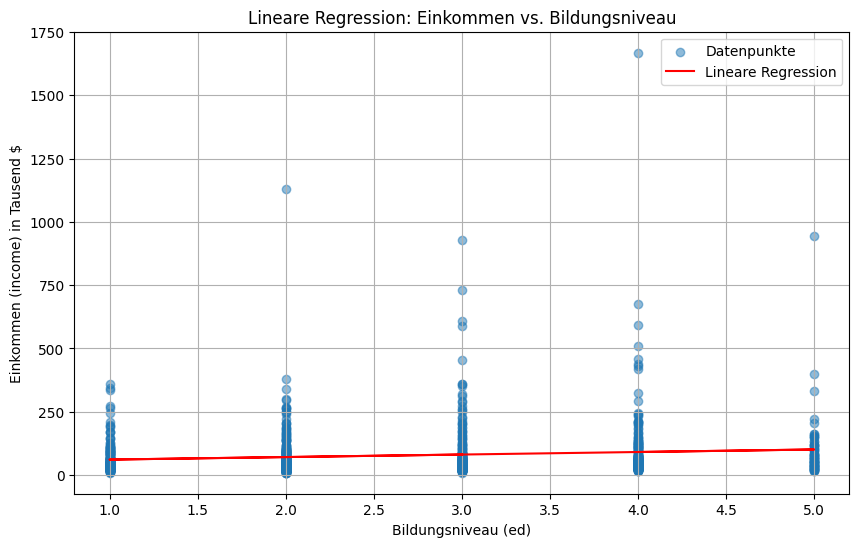

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Scatterplot der Datenpunkte
# Lineare Regression
X = telefonkunden[['ed']].values.reshape(-1, 1)
y = telefonkunden['income'].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
y_pred = linear_regressor.predict(X)

# Plot der linearen Regression
plt.figure(figsize=(10, 6))
plt.scatter(telefonkunden['ed'], telefonkunden['income'], alpha=0.5, label='Datenpunkte')
plt.plot(telefonkunden['ed'], y_pred, color='red', label='Lineare Regression')
plt.title('Lineare Regression: Einkommen vs. Bildungsniveau')
plt.xlabel('Bildungsniveau (ed)')
plt.ylabel('Einkommen (income) in Tausend $')
plt.legend()
plt.grid(True)
plt.show()


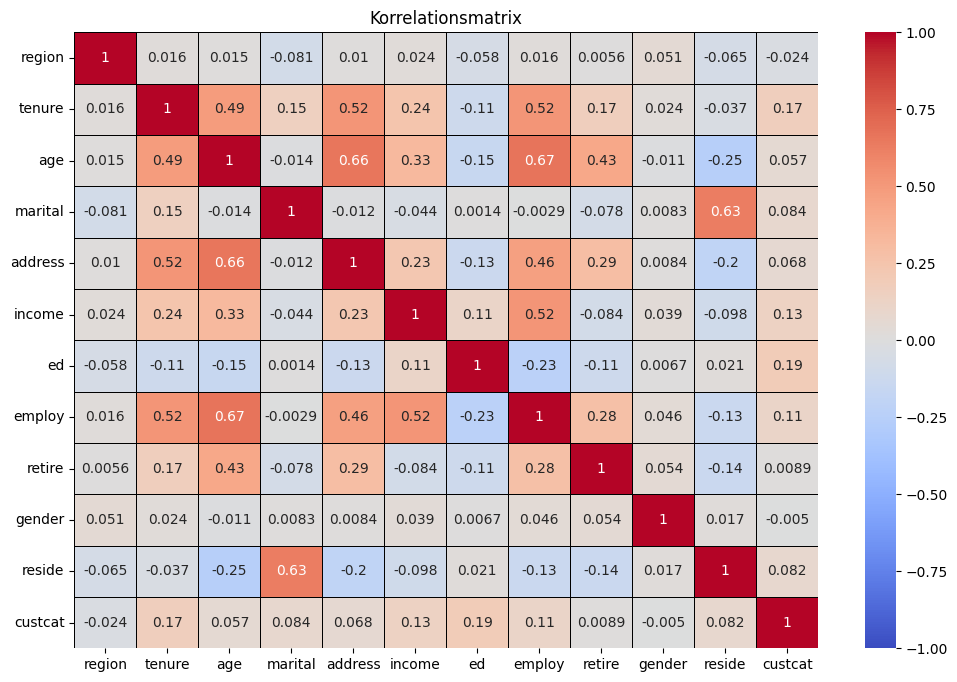

In [4]:
# Korrelationsmatrix
corr = telefonkunden.corr()
plt.figure(figsize=(12, 8))  # Größe der Figur anpassen
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5, linecolor='black')
plt.title('Korrelationsmatrix')
plt.show()

In [5]:
# Median berechnen und zur Tabelle hinzufügen
median = telefonkunden.median()
describe_df = telefonkunden.describe()
describe_df.loc['median'] = median
describe_df


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000
median,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000


In [ ]:
# Grundlegende Übersicht
print("Gender-Verteilung:")
print(telefonkunden['gender'].value_counts())

# Vergleich von Einkommen nach Gender
print("\nDurchschnittliches Einkommen nach Gender:")
print(telefonkunden.groupby('gender')['income'].mean())

Gender-Verteilung:
gender
1    517
0    483
Name: count, dtype: int64

Durchschnittliches Einkommen nach Gender:
gender
0    73.250518
1    81.537718
Name: income, dtype: float64


Durchschnittliches Einkommen nach Kundengruppe:
custcat
1    54.759398
2    74.834101
3    89.032028
4    92.000000
Name: income, dtype: float64


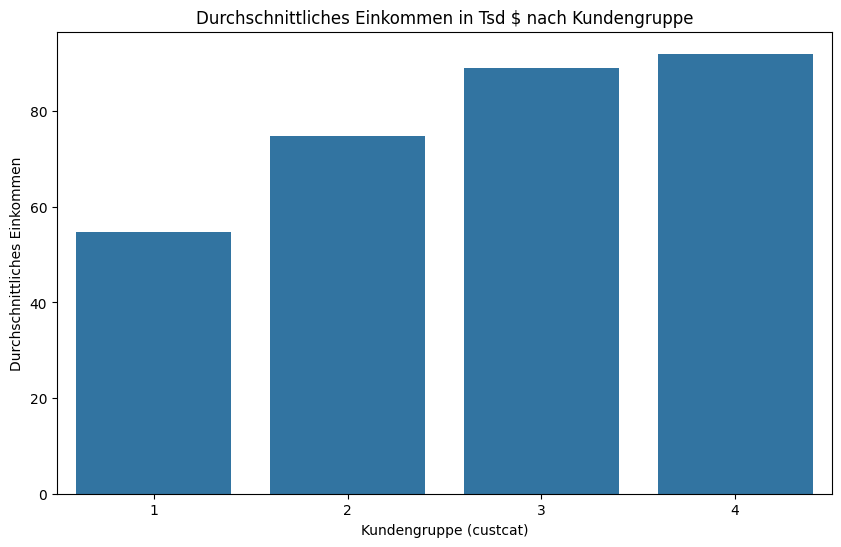

Durchschnittliche Zugehörigkeitsdauer nach Kundengruppe:
custcat
1    24.676692
2    43.345622
3    40.078292
4    35.144068
Name: tenure, dtype: float64


In [7]:
# Durchschnittliches Einkommen nach Kundengruppe (custcat) berechnen
avg_income_by_custcat = telefonkunden.groupby('custcat')['income'].mean()

# Ergebnis anzeigen
print("Durchschnittliches Einkommen nach Kundengruppe:")
print(avg_income_by_custcat)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_by_custcat.index, y=avg_income_by_custcat.values)
plt.title('Durchschnittliches Einkommen in Tsd $ nach Kundengruppe')
plt.xlabel('Kundengruppe (custcat)')
plt.ylabel('Durchschnittliches Einkommen')
plt.show()

# Durchschnittliche Zugehörigkeitsdauer (tenure) nach Kundengruppe berechnen
avg_tenure_by_custcat = telefonkunden.groupby('custcat')['tenure'].mean()

# Ergebnis anzeigen
print("Durchschnittliche Zugehörigkeitsdauer nach Kundengruppe:")
print(avg_tenure_by_custcat)

In [8]:
# Durchschnittswerte der Merkmale je Servicekategorie berechnen
avg_features_by_custcat = telefonkunden.groupby('custcat').mean()

# Ausgabe in einer Tabelle
avg_features_by_custcat

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
custcat,,,,,,,,,,,
1,2.090226,24.676692,39.657895,0.417293,9.390977,54.759398,2.364662,8.484962,0.041353,0.507519,2.199248
2,1.963134,43.345622,41.788018,0.529954,12.571429,74.834101,2.958525,10.576037,0.032258,0.548387,2.336406
3,1.996441,40.078292,44.430605,0.494662,13.380783,89.032028,2.153025,14.309609,0.078292,0.505338,2.227758
4,2.029661,35.144068,40.601695,0.550847,10.868644,92.000000,3.368644,10.228814,0.029661,0.512712,2.597458


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden.drop('custcat', axis=1)
Y = telefonkunden['custcat']

# Datenaufteilung in Trainings- und Testdaten
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# f_classif wird verwendet, um die ANOVA F-Statistik zwischen den Feauture und der Zielvariable zu berechnen. Diese Statistik misst die Abhängigkeit zwischen den Feauture und der Zielvariable
k_best = SelectKBest(score_func=f_classif, k='all')
#fit berechnet die Scores für jedes Feature basierend auf den Trainingsdaten (X_training) und der Zielvariable (Y_training).
k_best.fit(X_training, Y_training)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': k_best.scores_})
print("Feature Scores using SelectKBest:")
print(feature_scores.sort_values(by='Score', ascending=False))


# Feature-Selection: Recursive Feature Elimination (RFE)
# Ein RandomForestClassifier-Modell wird erstellt
model = RandomForestClassifier(random_state=1)
# RFE-Objekt wird erstellt, um die besten 5 Features auszuwählen
rfe = RFE(model, n_features_to_select=5)
# RFE wird auf die Trainingsdaten angewendet, um die besten Features zu ermitteln
rfe.fit(X_training, Y_training)
# Die Rankings der Features werden in einem DataFrame gespeichert
rfe_features = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
print("Feature Rankings using RFE:")
print(rfe_features.sort_values(by='Ranking'))

# Modelltraining und -bewertung mit den besten Features
selected_features = feature_scores.sort_values(by='Score', ascending=False)['Feature'].head(5).tolist()
X_train_selected = X_training[selected_features]
X_test_selected = X_test[selected_features]

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, Y_training)
Y_pred = knn.predict(X_test_selected)

print("Klassifikationsbericht mit ausgewählten Features:")
print(classification_report(Y_test, Y_pred))

Feature Scores using SelectKBest:
    Feature      Score
6        ed  53.817180
1    tenure  29.390559
7    employ  15.678875
4   address  10.281757
2       age   8.576518
5    income   5.774136
10   reside   4.634765
3   marital   2.695598
0    region   2.283164
8    retire   1.872375
9    gender   0.219995
Feature Rankings using RFE:
    Feature  Ranking
1    tenure        1
2       age        1
5    income        1
4   address        1
7    employ        1
6        ed        2
10   reside        3
0    region        4
9    gender        5
3   marital        6
8    retire        7
Klassifikationsbericht mit ausgewählten Features:
              precision    recall  f1-score   support

           1       0.36      0.45      0.40        53
           2       0.33      0.41      0.37        44
           3       0.29      0.29      0.29        56
           4       0.16      0.09      0.11        47

    accuracy                           0.31       200
   macro avg       0.29      0.31 

0.395
[0.345, 0.325, 0.38, 0.355, 0.335, 0.33, 0.355, 0.335, 0.35, 0.31, 0.345, 0.34, 0.38, 0.355, 0.36, 0.36, 0.38, 0.39, 0.395, 0.375, 0.37, 0.39, 0.37, 0.38, 0.385, 0.385, 0.36, 0.35, 0.335, 0.35, 0.345, 0.345, 0.335, 0.35, 0.36, 0.35, 0.365, 0.38, 0.395, 0.38, 0.385, 0.375, 0.355, 0.35, 0.35, 0.35, 0.36, 0.365, 0.355, 0.36, 0.355, 0.36, 0.365, 0.365, 0.375, 0.37, 0.375, 0.38, 0.38, 0.37, 0.365, 0.37, 0.385, 0.39, 0.37, 0.385, 0.4, 0.39, 0.38, 0.39, 0.385, 0.385, 0.38, 0.385, 0.385, 0.395, 0.39, 0.385, 0.39, 0.385, 0.38, 0.39, 0.37, 0.39, 0.405, 0.38, 0.385, 0.37, 0.36, 0.36, 0.36, 0.355, 0.35, 0.35, 0.36, 0.36, 0.365, 0.375, 0.385]


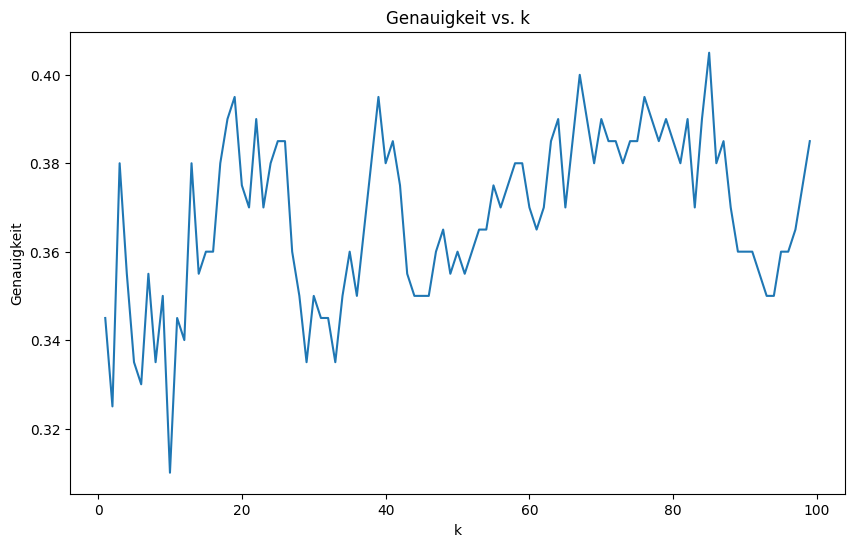

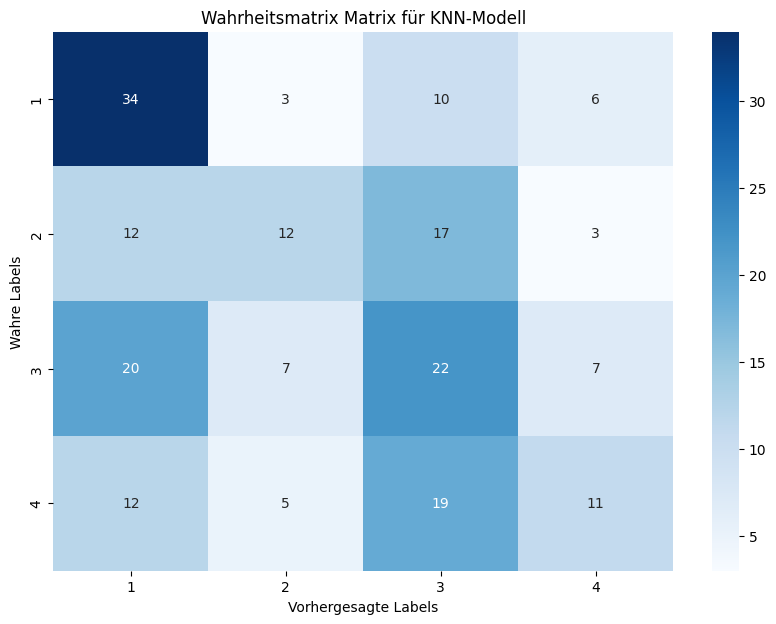

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Merkmale und Zielvariable definieren
X = telefonkunden[['tenure','age','income','address','employ','ed']] # Merkmale, die für die Vorhersage von 'custcat' relevant sind
Y = telefonkunden['custcat']

# Daten in Trainings- und Testset aufteilen 80/20 Split|Stratified --> gleiche Verteilung der Zielvariable
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# KNN-Modell erstellen und trainieren
knn = KNeighborsClassifier(n_neighbors=19)  # Anzahl der Nachbarn 
vorhersage_scikit = knn.fit(X_training, Y_training)

vorhersage_scikit = knn.predict(X_test)

# Genauigkeit der Vorhersage
print(accuracy_score(Y_test, vorhersage_scikit))

# Berechnung der Genauigkeit für verschiedene Werte von n_neighbors
scores = []
for k in range(1, 100):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_training, Y_training)
	y_pred = knn.predict(X_test)
	scores.append(accuracy_score(Y_test, y_pred))

# Berechnung der Genauigkeit für verschiedene Werte von n_neighbors
scores = []
for k in range(1, 100):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_training, Y_training)
	y_pred = knn.predict(X_test)
	scores.append(accuracy_score(Y_test, y_pred))

# Ausgabe der Genauigkeits-Scores
print(scores)

# Dies kann man auch noch grafisch darstellen. Dafür brauchen wir die matplotlib als gute Bibliothek für Datenvisualisierung:
import matplotlib.pyplot as plt

# Wir definieren eine Bildgröße
plt.figure(figsize=(10, 6))
# Wir plotten auf der x-Achse von 1 bis 100 (also die k's die wir oben in der for-Schleife durchprobiert haben)
plt.plot(range(1, 100), scores)
# Wir beschriften noch die Achsen
plt.title('Genauigkeit vs. k')
plt.xlabel('k')
plt.ylabel('Genauigkeit')
plt.show()

# Wahrheits Matrix
conf_matrix = confusion_matrix(Y_test, vorhersage_scikit)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Wahre Labels')
plt.title('Wahrheitsmatrix Matrix für KNN-Modell')
plt.show()

In [ ]:
#### Hyperparameter-Tuning mit GridSearchCV für KNN ####

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure', 'age', 'income', 'ed', 'gender', 'address']]  # Auswahl der relevanten Merkmale
y = telefonkunden['custcat']  # Zielvariable

# Datenaufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Aufteilung der Daten in Trainings- und Testset

# Feature-Skalierung
scaler = StandardScaler()  # Initialisierung des StandardScalers
X_train = scaler.fit_transform(X_train)  # Anpassung und Transformation der Trainingsdaten
X_test = scaler.transform(X_test)  # Transformation der Testdaten

# Hyperparameter-Raster für KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Anzahl der Nachbarn
    'weights': ['uniform', 'distance'],  # Gewichtung der Nachbarn
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distanzmetriken
}

# GridSearchCV-Objekt für KNN erstellen
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')  # Initialisierung von GridSearchCV mit KNN und Hyperparameter-Raster

# GridSearchCV auf Trainingsdaten anwenden
grid_search_knn.fit(X_train, y_train)  # Training des Modells mit GridSearchCV

# Beste Hyperparameter anzeigen
print("Beste Hyperparameter für KNN:", grid_search_knn.best_params_)  # Ausgabe der besten Hyperparameter

# Bestes Modell aus GridSearchCV extrahieren
best_knn = grid_search_knn.best_estimator_  # Extraktion des besten Modells

# Vorhersagen mit dem besten Modell machen
y_pred_best_knn = best_knn.predict(X_test)  # Vorhersagen für die Testdaten

# Klassifikationsbericht für das beste Modell anzeigen
print("Beste KNN Klassifikationsbericht:")  # Ausgabe des Klassifikationsberichts
print(classification_report(y_test, y_pred_best_knn))  # Klassifikationsbericht anzeigen

# Genauigkeit des besten Modells anzeigen
print("Beste KNN Genauigkeit:", accuracy_score(y_test, y_pred_best_knn))  # Ausgabe der Genauigkeit des Modells

Beste Hyperparameter für KNN: {'metric': 'manhattan', 'n_neighbors': 21, 'weights': 'distance'}
Beste KNN Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.38      0.38      0.38        53
           2       0.45      0.39      0.41        44
           3       0.43      0.50      0.46        56
           4       0.39      0.36      0.37        47

    accuracy                           0.41       200
   macro avg       0.41      0.41      0.41       200
weighted avg       0.41      0.41      0.41       200

Beste KNN Genauigkeit: 0.41


In [ ]:
###Normalisierung#######

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure','age','income','ed', 'gender', 'address']]
y = telefonkunden['custcat']

# Datenaufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature-Skalierung
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# k-NN Modell erstellen und trainieren
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Vorhersagen machen
y_pred = knn.predict(X_test)

# Modellbewertung
print("k-NN Klassifikationsbericht:")
print(classification_report(y_test, y_pred))
print("k-NN Genauigkeit:", accuracy_score(y_test, y_pred))


k-NN Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.38      0.53      0.44        53
           2       0.37      0.41      0.39        44
           3       0.49      0.46      0.48        56
           4       0.42      0.21      0.28        47

    accuracy                           0.41       200
   macro avg       0.41      0.40      0.40       200
weighted avg       0.42      0.41      0.40       200

k-NN Genauigkeit: 0.41


In [14]:
#################### Entscheidungsbaum (Decision Tree) ####################
# Ein Entscheidungsbaum ist ein Modell, das verwendet wird, um Entscheidungen zu treffen und Vorhersagen zu treffen.
# Er funktioniert, indem er die Daten in kleinere Teilmengen aufteilt, basierend auf bestimmten Merkmalen (Features).
# Jeder Knoten im Baum stellt eine Entscheidung dar, die auf einem bestimmten Merkmal basiert, und jeder Zweig stellt das Ergebnis dieser Entscheidung dar.
# Die Blätter des Baums repräsentieren die endgültigen Vorhersagen oder Entscheidungen.
# Entscheidungsbäume sind leicht zu interpretieren und können sowohl für Klassifikations- als auch für Regressionsaufgaben verwendet werden.

Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.41      0.40      0.40        53
           2       0.33      0.34      0.33        44
           3       0.36      0.38      0.37        56
           4       0.33      0.32      0.33        47

    accuracy                           0.36       200
   macro avg       0.36      0.36      0.36       200
weighted avg       0.36      0.36      0.36       200

Genauigkeit: 0.36


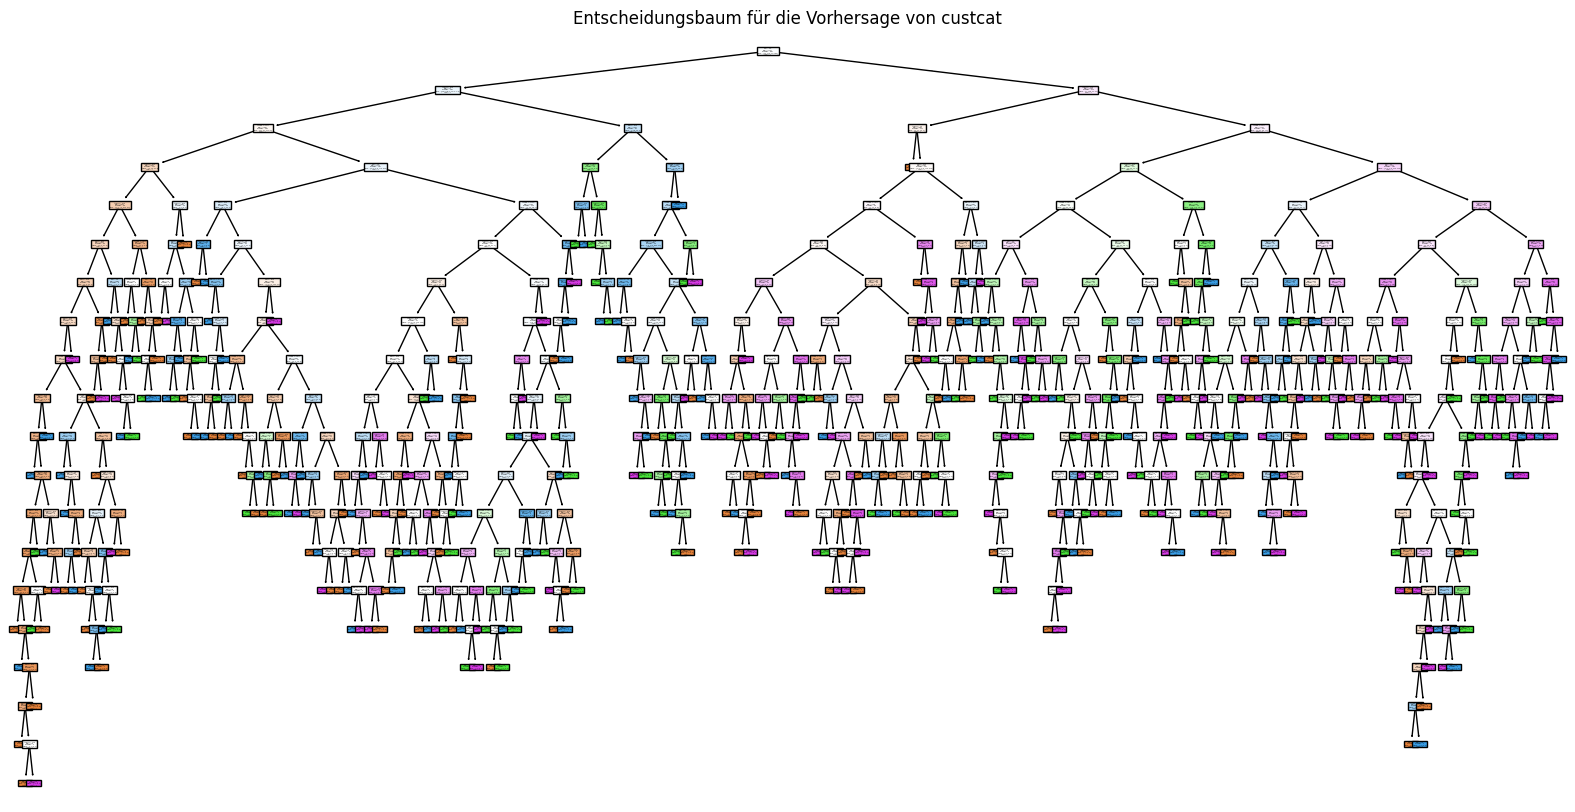

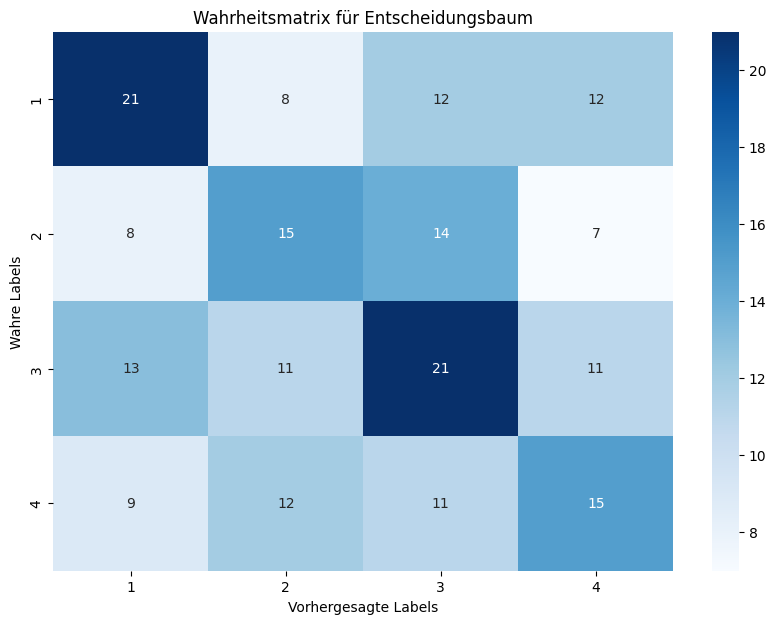

Feature Importance:
  Feature  Importance
2  income    0.276553
0  tenure    0.268701
1     age    0.231361
5  region    0.086536
3      ed    0.085130
4  gender    0.051719


In [8]:
# Entscheidungsbaum
from sklearn.tree import plot_tree

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure','age','income','ed', 'gender', 'region']] # Merkmale, die für die Vorhersage von 'custcat' relevant sind
Y = telefonkunden['custcat']

# Datenaufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# Entscheidungsbaum-Modell erstellen und trainieren
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# Vorhersagen machen
y_pred = tree.predict(X_test)

# Modellbewertung
print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))
print("Genauigkeit:", accuracy_score(y_test, y_pred))

# Entscheidungsbaum visualisieren
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns, class_names=[str(i) for i in tree.classes_], filled=True)
plt.title('Entscheidungsbaum für die Vorhersage von custcat')
plt.show()

# Wahrheitsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=tree.classes_, yticklabels=tree.classes_)
plt.xlabel('Vorhergesagte Labels')
plt.ylabel('Wahre Labels')
plt.title('Wahrheitsmatrix für Entscheidungsbaum')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_})
print("Feature Importance:")
print(feature_importance.sort_values(by='Importance', ascending=False))


In [13]:
### Normalsierung und Hyperparameter-Tuning mit GridSearchCV für Entscheidungsbaum ###
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Feature-Skalierung
scaler = StandardScaler()
X_training = scaler.fit_transform(X_training)
X_test = scaler.transform(X_test)

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure','age','income','ed', 'gender', 'region']]
Y = telefonkunden['custcat']

# Datenaufteilung in Trainings- und Testdaten
X_training, X_test, Y_training, y_test = train_test_split(X, Y, test_size=0.2, random_state=1, stratify=Y)

# Hyperparameter-Tuning mit GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_training, Y_training)

# Beste Hyperparameter anzeigen
print("Beste Hyperparameter:", grid_search.best_params_)

# Entscheidungsbaum-Modell mit den besten Hyperparameter erstellen und trainieren
best_tree = grid_search.best_estimator_
best_tree.fit(X_training, Y_training)

# Vorhersagen machen
y_pred = best_tree.predict(X_test)

# Modellbewertung
print("Klassifikationsbericht:")
print(classification_report(Y_test, y_pred))
print("Genauigkeit:", accuracy_score(Y_test, y_pred))

Beste Hyperparameter: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.34      0.38      0.36        53
           2       0.30      0.32      0.31        44
           3       0.28      0.30      0.29        56
           4       0.34      0.26      0.29        47

    accuracy                           0.32       200
   macro avg       0.32      0.31      0.31       200
weighted avg       0.32      0.32      0.31       200

Genauigkeit: 0.315


In [ ]:
##################### Random Forest #####################
# Random Forest ist ein Ensemble-Lernalgorithmus, der aus mehreren Entscheidungsbäumen besteht.
# Jeder Baum im Wald wird auf einem zufälligen Unterdatensatz des Datensatzes trainiert.

In [14]:
# Random Forest Modell

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden.drop('custcat', axis=1)  # Alle Spalten außer 'custcat' als Features
y = telefonkunden['custcat']  # 'custcat' als Zielvariable

# Datenaufteilung in Trainings- und Testdaten
X_training, X_test, Y_training, Y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Random Forest Modell
rf = RandomForestClassifier(random_state=1)  # Random Forest Modell initialisieren
rf.fit(X_training, Y_training)  # Modell mit Trainingsdaten trainieren
y_pred_rf = rf.predict(X_test)  # Vorhersagen für Testdaten machen
print("Random Forest Klassifikationsbericht:")
print(classification_report(Y_test, y_pred_rf))  # Klassifikationsbericht ausgeben
print("Random Forest Genauigkeit:", accuracy_score(y_test, y_pred_rf))  # Genauigkeit ausgeben

# Gradient Boosting Modell
# Gradient Boosting ist ein leistungsstarkes Ensemble-Lernverfahren, das mehrere schwache Modelle (typischerweise Entscheidungsbäume) kombiniert, um ein starkes Vorhersagemodell zu erstellen, 
# indem es iterativ die Fehler der vorherigen Modelle korrigiert. Es minimiert eine Verlustfunktion durch Gradientenabstieg und verbessert so schrittweise die Gesamtvorhersagegenauigkeit.
gb = GradientBoostingClassifier(random_state=1)  # Gradient Boosting Modell initialisieren
gb.fit(X_training, Y_training)  # Modell mit Trainingsdaten trainieren
y_pred_gb = gb.predict(X_test)  # Vorhersagen für Testdaten machen
print("Gradient Boosting Klassifikationsbericht:")
print(classification_report(Y_test, y_pred_gb))  # Klassifikationsbericht ausgeben
print("Gradient Boosting Genauigkeit:", accuracy_score(Y_test, y_pred_gb))  # Genauigkeit ausgeben


Random Forest Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.50      0.53      0.51        53
           2       0.37      0.32      0.34        44
           3       0.37      0.43      0.40        56
           4       0.37      0.32      0.34        47

    accuracy                           0.41       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.40      0.41      0.40       200

Random Forest Genauigkeit: 0.405
Gradient Boosting Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.48      0.40      0.43        53
           2       0.37      0.36      0.37        44
           3       0.34      0.41      0.37        56
           4       0.40      0.38      0.39        47

    accuracy                           0.39       200
   macro avg       0.40      0.39      0.39       200
weighted avg       0.40      0.39      0.39       200

Gradient Boosting

In [15]:
# Hyperparameter-Raster für Random Forest
# Ziel: Das optimale Set an Parametern für das Modell finden.
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Anzahl der Bäume im Wald
    'max_depth': [None, 10, 20, 30],  # Maximale Tiefe der Bäume
    'min_samples_split': [2, 5, 10],  # Minimale Anzahl von Proben, die erforderlich sind, um einen Knoten zu teilen
    'min_samples_leaf': [1, 2, 4]     # Minimale Anzahl von Proben, die in einem Blattknoten erforderlich sind
}

# GridSearchCV-Objekt für Random Forest erstellen
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=1), param_grid_rf, cv=5, scoring='accuracy')
# GridSearchCV: Automatisiert die Suche nach den besten Hyperparametern.
# param_grid_rf: Hyperparameter-Raster, über das iteriert wird.
# cv =5: Fünf-Fold-Cross-Validation zur Bewertung jedes Parameter-Sets.
# scoring='accuracy': Die Genauigkeit wird als Metrik verwendet, um die Leistung zu bewerten.

# GridSearchCV auf Trainingsdaten anwenden
grid_search_rf.fit(X_training, Y_training)

# Beste Hyperparameter anzeigen
print("Beste Hyperparameter für Random Forest:", grid_search_rf.best_params_)

# Bestes Modell aus GridSearchCV extrahieren
best_rf = grid_search_rf.best_estimator_

# Vorhersagen mit dem besten Modell machen
y_pred_best_rf = best_rf.predict(X_test)

# Klassifikationsbericht für das beste Modell anzeigen
print("Beste Random Forest Klassifikationsbericht:")
print(classification_report(Y_test, y_pred_best_rf))

# Genauigkeit des besten Modells anzeigen
print("Beste Random Forest Genauigkeit:", accuracy_score(Y_test, y_pred_best_rf))

Beste Hyperparameter für Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Beste Random Forest Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.47      0.53      0.50        53
           2       0.42      0.32      0.36        44
           3       0.32      0.38      0.35        56
           4       0.43      0.38      0.40        47

    accuracy                           0.41       200
   macro avg       0.41      0.40      0.40       200
weighted avg       0.41      0.41      0.40       200

Beste Random Forest Genauigkeit: 0.405


In [ ]:
##################### Neuronales Netz #####################
# Ein neuronales Netz ist ein Modell, das aus einer Reihe von miteinander verbundenen Neuronen besteht, die in Schichten organisiert sind.
# Jedes Neuron nimmt Eingaben, führt eine Berechnung durch und gibt eine Ausgabe weiter. Die Ausgaben der Neuronen in einer Schicht werden an die nächste Schicht weitergegeben.
# Neuronale Netze können verwendet werden, um komplexe nichtlineare Beziehungen in den Daten zu modellieren und Vorhersagen zu treffen.

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure','age','income','ed', 'gender', 'region']]  # Auswahl der relevanten Features
y = telefonkunden['custcat']  # Zielvariable

# Zielvariable in kategorische Form umwandeln
y = to_categorical(y)  # One-Hot-Encoding der Zielvariable

# Datenaufteilung in Trainings- und Testdaten
X_training, X_test, Y_training, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Aufteilung der Daten in Trainings- und Testset

# Feature-Skalierung
scaler = StandardScaler()  # Initialisierung des StandardScalers
X_train = scaler.fit_transform(X_training)  # Anpassung und Transformation der Trainingsdaten
X_test = scaler.transform(X_test)  # Transformation der Testdaten

# Neuronales Netz erstellen
model = Sequential()  # Initialisierung des Modells
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Hinzufügen der ersten Schicht mit 64 Neuronen und ReLU-Aktivierung (Aktivierungsfunktion)
model.add(Dense(32, activation='relu'))  # Hinzufügen der zweiten Schicht mit 32 Neuronen und ReLU-Aktivierung
model.add(Dense(Y_training.shape[1], activation='softmax'))  # Hinzufügen der Ausgabeschicht mit Softmax-Aktivierung

# Modell kompilieren
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Kompilierung des Modells mit Verlustfunktion, Optimierer und Metrik

# Modell trainieren
model.fit(X_train, Y_training, epochs=50, validation_data=(X_test, Y_test), verbose=0)  # Training des Modells mit 50 Epochen und Validierungsdaten

# Vorhersagen machen
y_pred = model.predict(X_test)  # Vorhersagen für die Testdaten
y_pred_classes = y_pred.argmax(axis=1)  # Umwandlung der Vorhersagen in Klassen
y_test_classes = Y_test.argmax(axis=1)  # Umwandlung der Testdaten in Klassen

# Modellbewertung
print("Neuronales Netz Klassifikationsbericht:")  # Ausgabe des Klassifikationsberichts
print(classification_report(y_test_classes, y_pred_classes))  # Klassifikationsbericht anzeigen
print("Neuronales Netz Genauigkeit:", accuracy_score(y_test_classes, y_pred_classes))  # Genauigkeit des Modells anzeigen

c:\Users\adria\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Neuronales Netz Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.45      0.60      0.52        53
           2       0.33      0.32      0.33        44
           3       0.51      0.52      0.51        56
           4       0.40      0.26      0.31        47

    accuracy                           0.43       200
   macro avg       0.42      0.42      0.42       200
weighted avg       0.43      0.43      0.43       200

Neuronales Netz Genauigkeit: 0.435


In [ ]:
##################### NN Optimierungen #####################

# Batch Normalization: Die Batch-Normalisierungsschichten (BatchNormalization()) helfen, die Trainingsstabilität zu verbessern und die Konvergenz zu beschleunigen.
# Dropout: Die Dropout-Schichten (Dropout(0.5)) helfen, Überanpassung zu vermeiden, indem sie zufällig Neuronen während des Trainings deaktivieren.
# Early Stopping: Der Early Stopping Callback (EarlyStopping) beendet das Training, wenn sich die Validierungsleistung nicht mehr verbessert, um Überanpassung zu vermeiden.
# Erweiterte Optimierer: Der Adam-Optimierer (optimizer='adam') wird verwendet, um die Lernrate adaptiv anzupassen.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure','age','income','ed', 'gender', 'region']] # wenn alle Feautures verwendet werden ist die Genauigkeit identisch
y = telefonkunden['custcat']

# Zielvariable in kategorische Form umwandeln
y = to_categorical(y)

# Datenaufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature-Skalierung
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neuronales Netz erstellen
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch-Normalisierung hinzufügen
model.add(Dropout(0.5))  # Dropout-Schicht hinzufügen
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch-Normalisierung hinzufügen
model.add(Dropout(0.5))  # Dropout-Schicht hinzufügen
model.add(Dense(y_train.shape[1], activation='softmax'))

# Modell kompilieren
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Modell trainieren
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

# Vorhersagen machen
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Modellbewertung
print("Optimiertes Neuronales Netz Klassifikationsbericht:")
print(classification_report(y_test_classes, y_pred_classes))
print("Optimiertes Neuronales Netz Genauigkeit:", accuracy_score(y_test_classes, y_pred_classes))

c:\Users\adria\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Optimiertes Neuronales Netz Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.44      0.58      0.50        53
           2       0.57      0.27      0.37        44
           3       0.42      0.48      0.45        56
           4       0.52      0.49      0.51        47

    accuracy                           0.47       200
   macro avg       0.49      0.46      0.46       200
weighted avg       0.48      0.47      0.46       200

Optimiertes Neuronales Netz Genauigkeit: 0.465


In [ ]:
############# Die Principal Component Analysis (PCA) ################
# ist eine statistische Methode zur Dimensionsreduktion von Datensätzen. Sie wird häufig eingesetzt, um die Anzahl der Features (Merkmale) in einem Datensatz zu reduzieren, ohne dabei die wichtigen Informationen wesentlich zu verlieren.

Erklärte Varianz durch die Hauptkomponenten: [0.41431901 0.35931742]


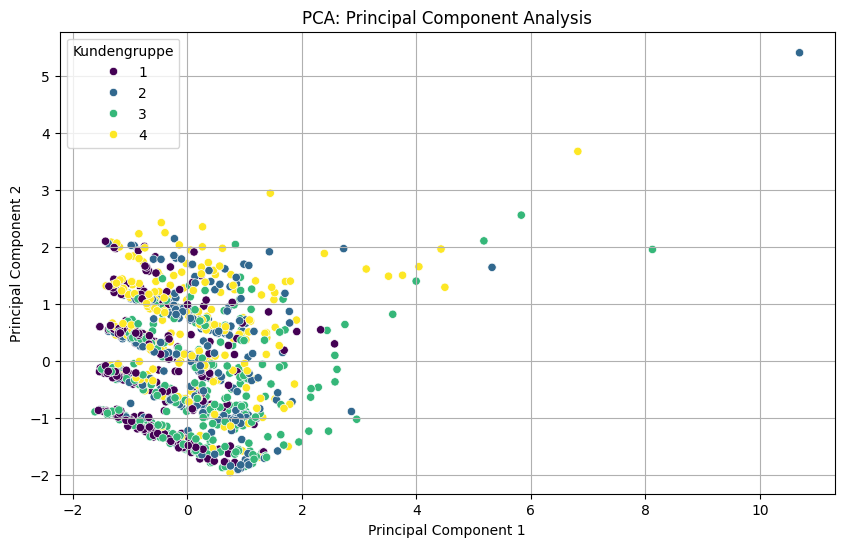

In [ ]:
```python
from sklearn.decomposition import PCA  # Import der PCA-Klasse aus scikit-learn

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure', 'income', 'ed']]  # Entfernen der Zielvariable 'custcat' aus den Features
y = telefonkunden['custcat']  # Zielvariable 'custcat'

# Feature-Skalierung
scaler = StandardScaler()  # Initialisierung des StandardScalers
X_scaled = scaler.fit_transform(X)  # Anpassung und Transformation der Features

# PCA-Objekt erstellen und Anzahl der Komponenten festlegen
pca = PCA(n_components=2)  # PCA-Objekt mit 2 Hauptkomponenten initialisieren

# PCA auf die skalierten Daten anwenden
X_pca = pca.fit_transform(X_scaled)  # Transformation der Daten mit PCA

# Erstellen eines DataFrames mit den PCA-Ergebnissen
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])  # DataFrame mit den Hauptkomponenten erstellen
pca_df['custcat'] = y.values  # Hinzufügen der Zielvariable zum DataFrame

# Ausgabe der erklärten Varianz durch die Hauptkomponenten
print("Erklärte Varianz durch die Hauptkomponenten:", pca.explained_variance_ratio_)  # Ausgabe der erklärten Varianz

# Plot der Hauptkomponenten
plt.figure(figsize=(10, 6))  # Größe der Figur festlegen
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='custcat', data=pca_df, palette='viridis')  # Scatterplot der Hauptkomponenten
plt.title('PCA: Principal Component Analysis')  # Titel des Plots
plt.xlabel('Principal Component 1')  # Beschriftung der x-Achse
plt.ylabel('Principal Component 2')  # Beschriftung der y-Achse
plt.legend(title='Kundengruppe')  # Legende hinzufügen
plt.grid(True)  # Gitterlinien hinzufügen
plt.show()  # Plot anzeigen


In [ ]:
```python
############# Supported Vector Machine ################
# t ein überwachtes maschinelles Lernverfahren, das sowohl für Klassifikationsprobleme als auch für Regressionsaufgaben eingesetzt werden kann. 
# Sie ist besonders effektiv bei der Trennung von Daten in hochdimensionalen Räumen. Hier sind die zentralen Konzepte:


SVM Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.34      0.38      0.36        53
           2       0.36      0.27      0.31        44
           3       0.42      0.50      0.46        56
           4       0.46      0.40      0.43        47

    accuracy                           0.40       200
   macro avg       0.40      0.39      0.39       200
weighted avg       0.40      0.40      0.39       200

SVM Genauigkeit: 0.395
SVM mit PCA Klassifikationsbericht:
              precision    recall  f1-score   support

           1       0.43      0.51      0.47        53
           2       0.00      0.00      0.00        44
           3       0.39      0.48      0.43        56
           4       0.45      0.62      0.52        47

    accuracy                           0.41       200
   macro avg       0.32      0.40      0.36       200
weighted avg       0.33      0.41      0.37       200

SVM mit PCA Genauigkeit: 0.415


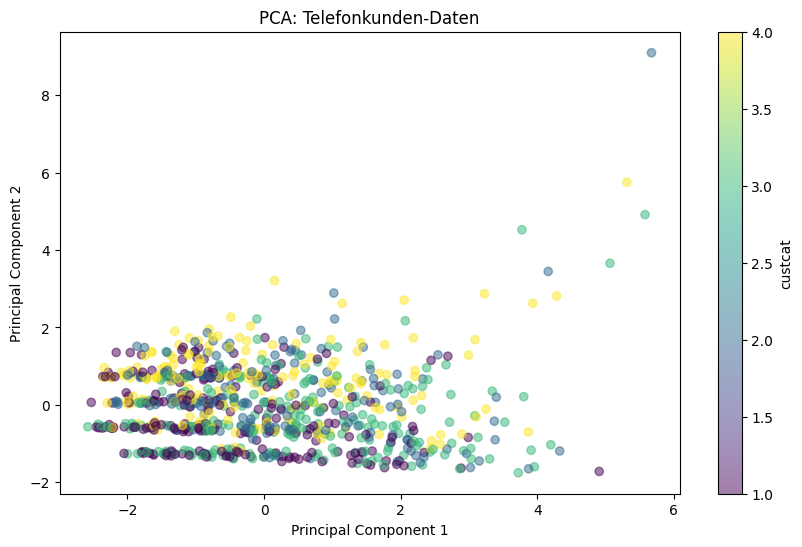

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

In [14]:
from sklearn.svm import SVC

# Datenaufteilung in Features (X) und Zielvariable (y)
X = telefonkunden[['tenure', 'age', 'income', 'ed', 'address']]
y = telefonkunden['custcat']

# Datenaufteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature-Skalierung
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVM-Modell erstellen und trainieren
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Vorhersagen machen
y_pred = svm.predict(X_test)

# Modellbewertung
print("SVM Klassifikationsbericht:")
print(classification_report(y_test, y_pred))
print("SVM Genauigkeit:", accuracy_score(y_test, y_pred))

# PCA
from sklearn.decomposition import PCA

# PCA-Modell erstellen
pca = PCA(n_components=2)  # Reduktion auf 2 Dimensionen
X_train_pca = pca.fit_transform(X_train)  # Transformation der Trainingsdaten
X_test_pca = pca.transform(X_test)  # Transformation der Testdaten

# SVM-Modell mit PCA erstellen und trainieren
svm_pca = SVC(kernel='linear', random_state=42)  # SVM-Modell mit linearem Kernel
svm_pca.fit(X_train_pca, y_train)  # Modell mit Trainingsdaten trainieren
y_pred_pca = svm_pca.predict(X_test_pca)  # Vorhersagen

# Modellbewertung mit PCA
print("SVM mit PCA Klassifikationsbericht:")
print(classification_report(y_test, y_pred_pca))
print("SVM mit PCA Genauigkeit:", accuracy_score(y_test, y_pred_pca))

# Scatterplot der Datenpunkte
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA: Telefonkunden-Daten')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='custcat')
plt.show()

# Hyperparameter-Tuning mit GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Beste Hyperparameter anzeigen
print("Beste Hyperparameter für SVM:", grid.best_params_)

# Vorhersagen mit dem besten Modell machen
grid_predictions = grid.predict(X_test)

# Modellbewertung
print("SVM mit Hyperparameter-Tuning Klassifikationsbericht:")
print(classification_report(y_test, grid_predictions))
print("SVM mit Hyperparameter-Tuning Genauigkeit:", accuracy_score(y_test, grid_predictions))

# Warum könnte Hyperparameter-Tuning helfen?
# 1. Optimale Trennlinie finden: Die SVM versucht, die Klassen durch eine Hyperplane zu trennen. Die Wahl der richtigen Hyperparameter kann die Lage und Form dieser Trennlinie stark verbessern.
# 2. Overfitting/Underfitting vermeiden: Der PCA-Plot zeigt, dass die Klassen stark überlappen, wodurch das Modell leicht underfitten kann. Eine gute Balance durch Tuning (z. B. durch C und gamma) kann die Leistung erhöhen.
# 3. Nichtlineare Muster lernen: Die Daten scheinen keine lineare Trennbarkeit aufzuweisen. Durch die Verwendung eines nichtlinearen Kernels könnte das Modell komplexere Muster besser erfassen.